## 00.01 Importaciones

In [1]:
# Manejo de archivos y tiempo
import os
import json
from time import sleep
from datetime import datetime, timedelta

# NumPy y Pandas
import numpy as np
import pandas as pd
import hashlib

# Visualización
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Escalado
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# GridSearchCV y Validación
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold, StratifiedKFold

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

# Modelos clásicos de series temporales
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Modelos de machine learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# PyTorch (Alternativa a Keras/TensorFlow)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Guardado y carga de modelos
import joblib

# Manejo de advertencias
import warnings

In [2]:
# Quiero ver todas las columnas sin elípsis.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 00.02 Declaración de funciones

## 00.02.01 informar_dfs()

In [3]:
def informar_dfs(df):
    datos_nulos = df.isnull().sum().sum()
    cadenas_vacias = df[df == ''].sum().sum()
    nones = df[df == 'None'].sum().sum()
    return f"El Dataframe contiene {int(datos_nulos)} nulos, {int(cadenas_vacias)} cadenas vacias y {int(nones)} 'nones'"

## 01 EDA

### 01.01 Lectura "diabetes_012_health_indicators_BRFSS2015.csv"

In [4]:
path_csv1 = 'data/diabetes_012_health_indicators_BRFSS2015.csv'

df_1 = pd.read_csv(path_csv1)
df_1.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


### 01.01.01 Exploración "diabetes_012_health_indicators_BRFSS2015.csv"

In [5]:
indicadores_df_1 = df_1.copy()
indicadores_df_1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
columnas_indicadores_1 = {
    'Diabetes_012': 'Diabetes',
    'HighBP': 'Hipertensión',
    'HighChol': 'Colesterol',
    'CholCheck': 'Análisis_colesterol',
    'BMI': 'IMC',
    'Smoker': 'Fumador',
    'Stroke': 'Ictus',
    'HeartDiseaseorAttack': 'Enfermedad_Cardiaca_Infarto',
    'PhysActivity': 'Actividad_física',
    'Fruits': 'Frutas',
    'Veggies': 'Verduras',
    'HvyAlcoholConsump': 'Consumo_alto_alcohol',
    'AnyHealthcare': 'Cuidado_médico',
    'NoDocbcCost': 'Motivos_económicos ',
    'GenHlth': 'Salud_general',
    'MentHlth': 'Salud_mental',
    'PhysHlth': 'Salud_física',
    'DiffWalk': 'Dificultad_caminar',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'Education': 'Educación',
    'Income': 'Ingresos'
}

indicadores_df_1.rename(columns = columnas_indicadores_1, inplace = True)

indicadores_df_1.sample(10)

,Diabetes,Hipertensión,Colesterol,Análisis_colesterol,IMC,Fumador,Ictus,Enfermedad_Cardiaca_Infarto,Actividad_física,Frutas,Verduras,Consumo_alto_alcohol,Cuidado_médico,Motivos_económicos,Salud_general,Salud_mental,Salud_física,Dificultad_caminar,Sexo,Edad,Educación,Ingresos
91220,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,6.0,7.0
28942,0.0,0.0,0.0,1.0,18.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,10.0,30.0,1.0,0.0,8.0,3.0,3.0
98660,0.0,1.0,1.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
39286,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0
235523,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
178446,0.0,0.0,1.0,1.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,30.0,0.0,1.0,0.0,7.0,2.0,6.0
130948,0.0,0.0,1.0,1.0,37.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,4.0,6.0
5469,0.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,15.0,0.0,1.0,11.0,4.0,4.0
48002,0.0,0.0,1.0,1.0,48.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,30.0,1.0,1.0,7.0,6.0,8.0
217986,0.0,0.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,7.0,6.0,7.0


In [7]:
informar_dfs(indicadores_df_1)

"El Dataframe contiene 0 nulos, 0 cadenas vacias y 0 'nones'"

### 01.02 Lectura "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

In [8]:
path_csv2 = 'data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

df_2 = pd.read_csv(path_csv2)
df_2.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [9]:
indicadores_df_2 = df_2.copy()

indicadores_df_2.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [10]:
indicadores_df_2.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [11]:
columnas_indicadores_df_2 = {
    'Diabetes_binary': 'Diabetes',
    'HighBP': 'Hipertensión',
    'HighChol': 'Colesterol',
    'CholCheck': 'Análisis_colesterol',
    'BMI': 'IMC',
    'Smoker': 'Fumador',
    'Stroke': 'Ictus',
    'HeartDiseaseorAttack': 'Enfermedad_Cardiaca_Infarto',
    'PhysActivity': 'Actividad_física',
    'Fruits': 'Frutas',
    'Veggies': 'Verduras',
    'HvyAlcoholConsump': 'Consumo_alto_alcohol',
    'AnyHealthcare': 'Cuidado_médico',
    'NoDocbcCost': 'Motivos_económicos ',
    'GenHlth': 'Salud_general',
    'MentHlth': 'Salud_mental',
    'PhysHlth': 'Salud_física',
    'DiffWalk': 'Dificultad_caminar',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'Education': 'Educación',
    'Income': 'Ingresos'
}

indicadores_df_2.rename(columns = columnas_indicadores_df_2, inplace = True)

indicadores_df_2.sample(10)

,Diabetes,Hipertensión,Colesterol,Análisis_colesterol,IMC,Fumador,Ictus,Enfermedad_Cardiaca_Infarto,Actividad_física,Frutas,Verduras,Consumo_alto_alcohol,Cuidado_médico,Motivos_económicos,Salud_general,Salud_mental,Salud_física,Dificultad_caminar,Sexo,Edad,Educación,Ingresos
68667,1.0,1.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,5.0,10.0,0.0,0.0,11.0,6.0,6.0
54002,1.0,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,7.0
31364,0.0,1.0,0.0,1.0,34.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
28833,0.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,6.0
37191,1.0,0.0,1.0,1.0,53.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,28.0,1.0,0.0,8.0,5.0,7.0
59968,1.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0
36359,1.0,1.0,1.0,1.0,44.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,4.0,0.0,0.0,0.0,8.0,4.0,6.0
65423,1.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,0.0,1.0,7.0,6.0,7.0
70342,1.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,8.0,6.0,2.0
25302,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [12]:
informar_dfs(indicadores_df_2)

"El Dataframe contiene 0 nulos, 0 cadenas vacias y 0 'nones'"

### 01.03 Lectura "diabetes_binary_health_indicators_BRFSS2015.csv"

In [13]:
path_csv3 = 'data/diabetes_binary_health_indicators_BRFSS2015.csv'

df_3 = pd.read_csv(path_csv3)
df_3.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [14]:
indicadores_df_3 = df_3.copy()

indicadores_df_3.tail(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253671,0.0,1.0,1.0,1.0,23.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
253672,0.0,1.0,0.0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [15]:
columnas_indicadores_df_3 = {
    'Diabetes_binary': 'Diabetes',
    'HighBP': 'Hipertensión',
    'HighChol': 'Colesterol',
    'CholCheck': 'Análisis_colesterol',
    'BMI': 'IMC',
    'Smoker': 'Fumador',
    'Stroke': 'Ictus',
    'HeartDiseaseorAttack': 'Enfermedad_Cardiaca_Infarto',
    'PhysActivity': 'Actividad_física',
    'Fruits': 'Frutas',
    'Veggies': 'Verduras',
    'HvyAlcoholConsump': 'Consumo_alto_alcohol',
    'AnyHealthcare': 'Cuidado_médico',
    'NoDocbcCost': 'Motivos_económicos ',
    'GenHlth': 'Salud_general',
    'MentHlth': 'Salud_mental',
    'PhysHlth': 'Salud_física',
    'DiffWalk': 'Dificultad_caminar',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'Education': 'Educación',
    'Income': 'Ingresos'
}

indicadores_df_3.rename(columns = columnas_indicadores_df_3, inplace = True)

indicadores_df_3.sample(10)

,Diabetes,Hipertensión,Colesterol,Análisis_colesterol,IMC,Fumador,Ictus,Enfermedad_Cardiaca_Infarto,Actividad_física,Frutas,Verduras,Consumo_alto_alcohol,Cuidado_médico,Motivos_económicos,Salud_general,Salud_mental,Salud_física,Dificultad_caminar,Sexo,Edad,Educación,Ingresos
89762,0.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,5.0,7.0
58613,0.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,13.0,4.0,7.0
139152,1.0,1.0,0.0,1.0,43.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,6.0,5.0
156108,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,6.0,1.0
15670,0.0,1.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
59913,0.0,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,8.0,6.0,8.0
40543,0.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,13.0,6.0,7.0
193127,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,5.0,8.0
183503,1.0,0.0,0.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,11.0,5.0,5.0
187972,0.0,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,6.0,4.0,7.0


In [16]:
informar_dfs(indicadores_df_3)

"El Dataframe contiene 0 nulos, 0 cadenas vacias y 0 'nones'"

## 02 Gráficas

In [17]:
indicadores_graficas_1 = indicadores_df_1.copy()

### Matriz de correlación de Pearson
- Mide la relación lineal entre 2 variables.

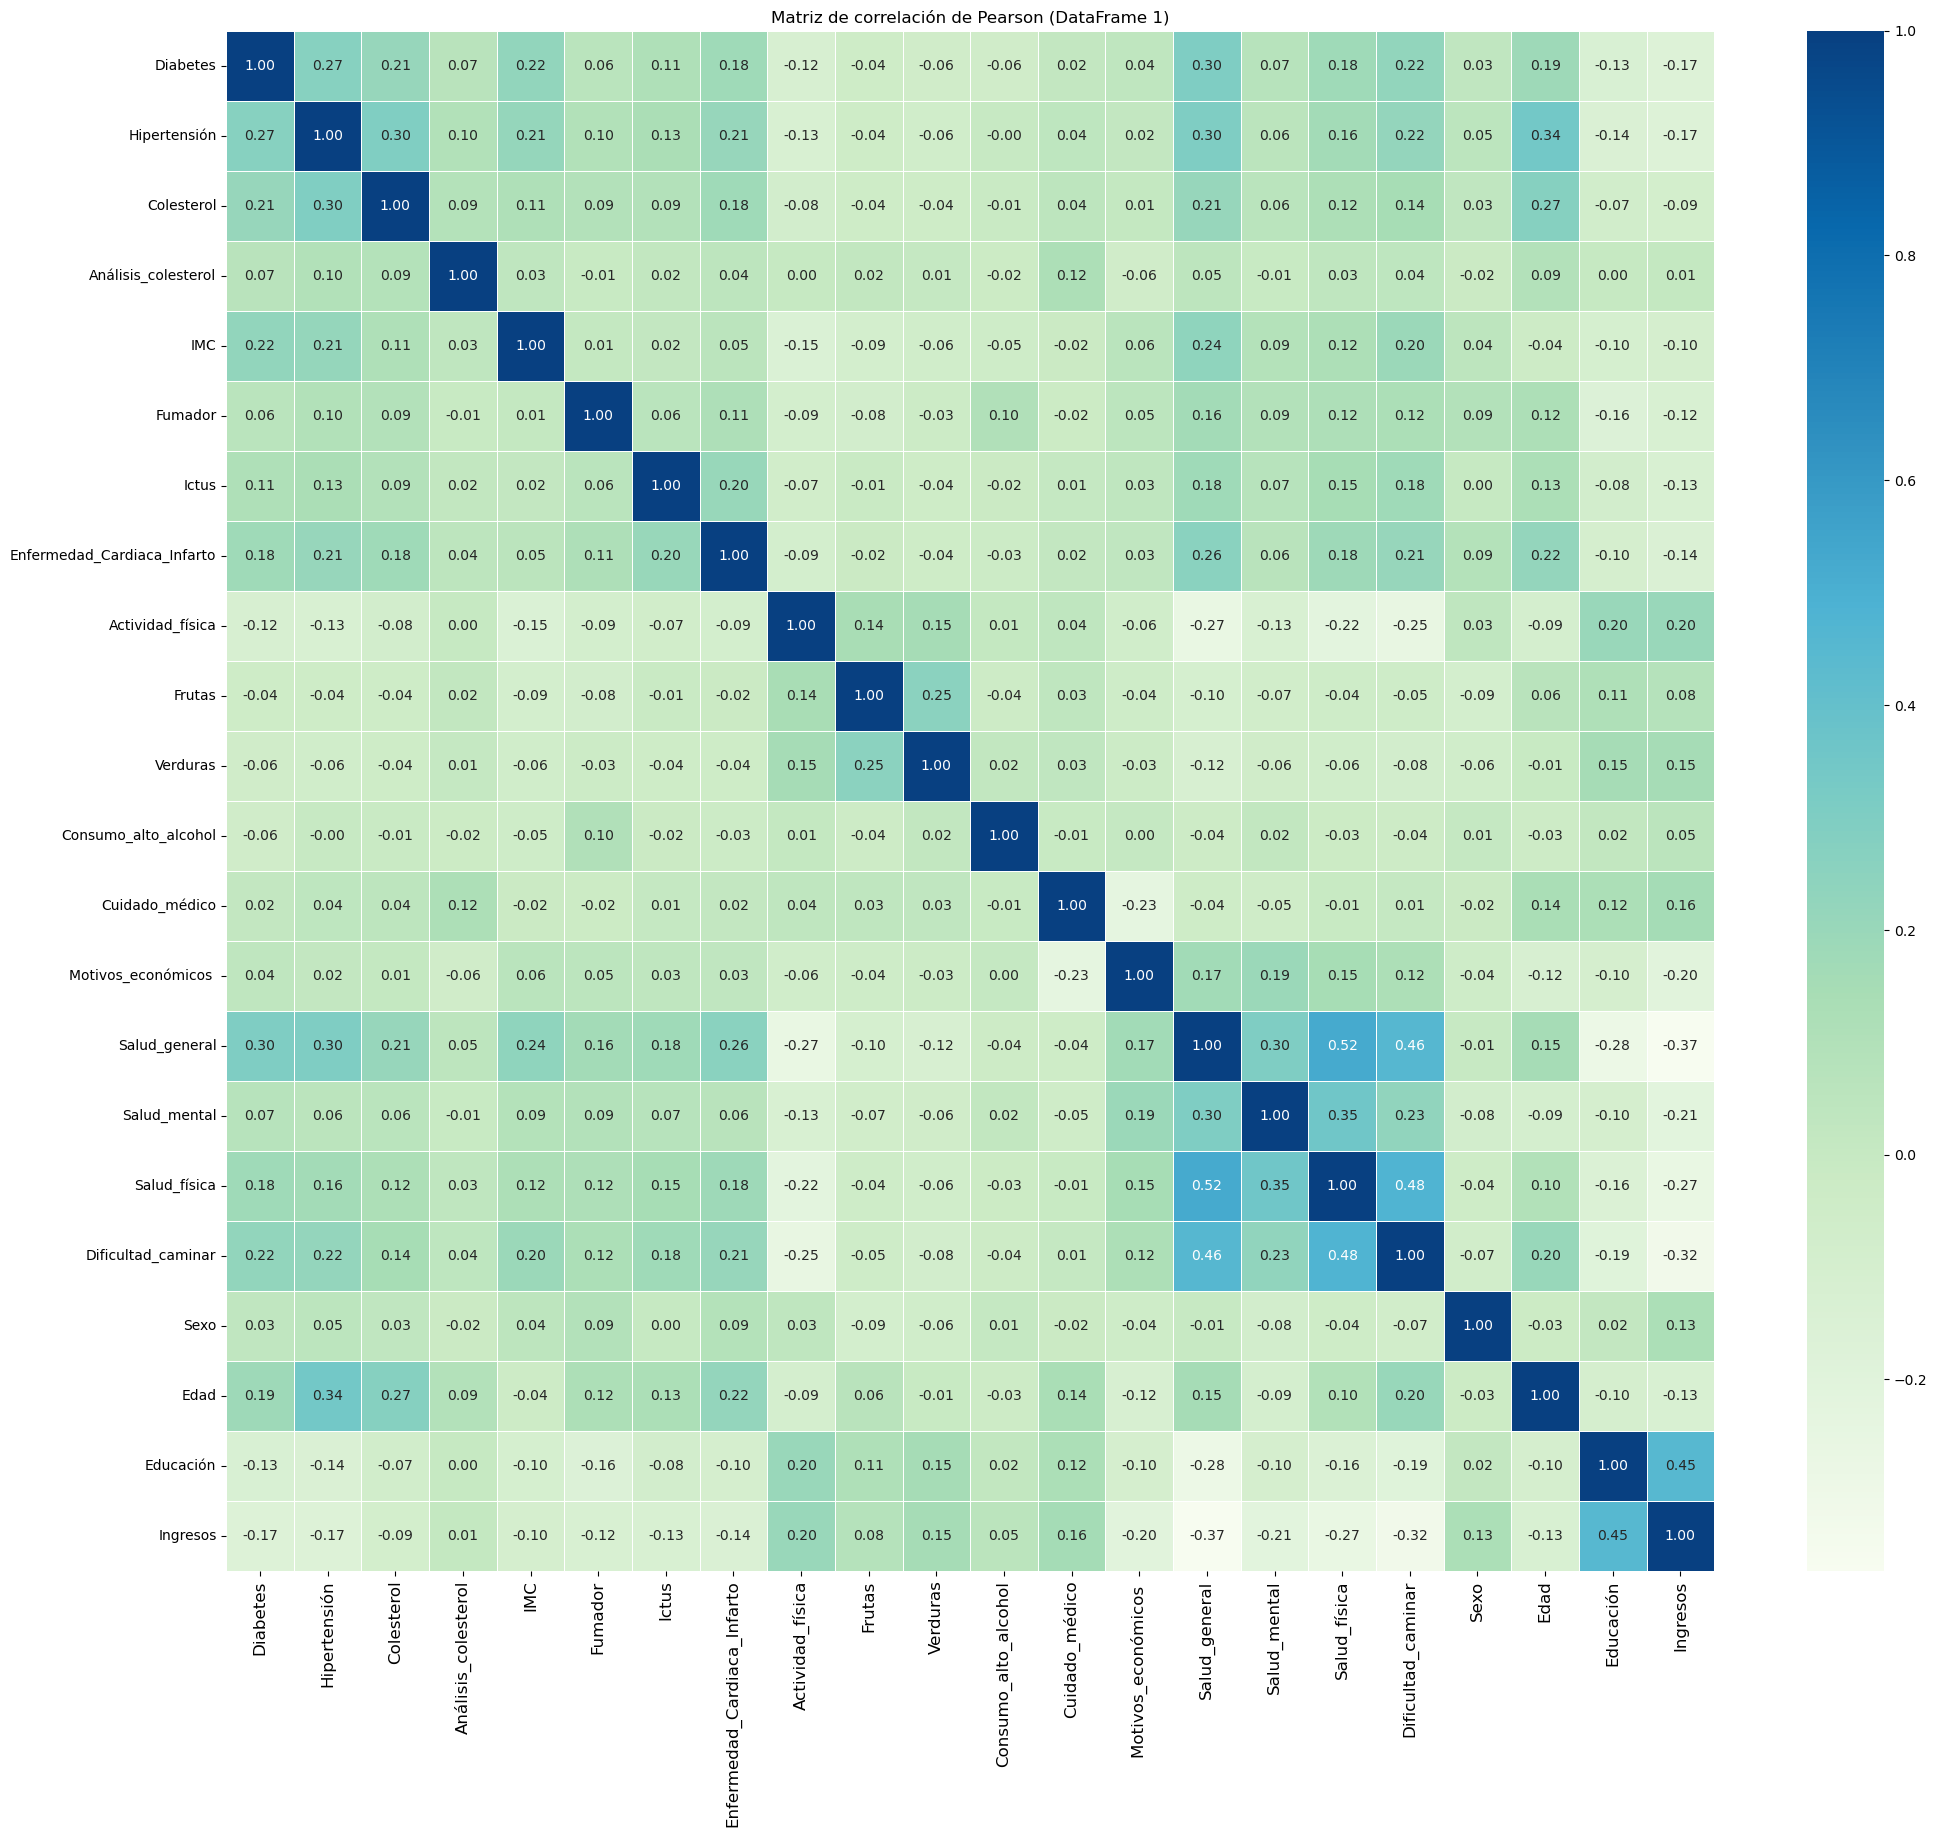

In [18]:
matriz_correlacion_1 = indicadores_df_1.corr()

plt.figure(figsize = (24, 20))
sns.heatmap(matriz_correlacion_1, annot = True, fmt = '.2f', cmap = 'GnBu', linewidths = 0.5)
plt.title('Matriz de correlación de Pearson (DataFrame 1)')
plt.xticks(fontsize = 12)
plt.show()

In [19]:
# Transformo la matriz de correlación de Pearson en un dataframe largo
pares_correlacionados_1 = matriz_correlacion_1.unstack().reset_index()
pares_correlacionados_1.columns = ['Diabetes', 'Variable', 'Correlación de Pearson']

pares_correlacionados_1 = pares_correlacionados_1[pares_correlacionados_1['Diabetes'] == 'Diabetes']

pares_correlacionados_1['Pearson en valor absoluto'] = pares_correlacionados_1['Correlación de Pearson'].abs()
pares_correlacionados_1 = pares_correlacionados_1.sort_values(by = 'Pearson en valor absoluto', ascending = False).reset_index(drop = True)

pares_correlacionados_1 = pares_correlacionados_1.round(2)
pares_correlacionados_1


,Diabetes,Variable,Correlación de Pearson,Pearson en valor absoluto
0,Diabetes,Diabetes,1.00,1.00
1,Diabetes,Salud_general,0.30,0.30
2,Diabetes,Hipertensión,0.27,0.27
3,Diabetes,IMC,0.22,0.22
4,Diabetes,Dificultad_caminar,0.22,0.22
5,Diabetes,Colesterol,0.21,0.21
6,Diabetes,Edad,0.19,0.19
7,Diabetes,Enfermedad_Cardiaca_Infarto,0.18,0.18
8,Diabetes,Salud_física,0.18,0.18
9,Diabetes,Ingresos,-0.17,0.17


In [20]:
pares_correlacionados_1.drop('Pearson en valor absoluto', axis = 1, inplace = True)
pares_correlacionados_1

,Diabetes,Variable,Correlación de Pearson
0,Diabetes,Diabetes,1.00
1,Diabetes,Salud_general,0.30
2,Diabetes,Hipertensión,0.27
3,Diabetes,IMC,0.22
4,Diabetes,Dificultad_caminar,0.22
5,Diabetes,Colesterol,0.21
6,Diabetes,Edad,0.19
7,Diabetes,Enfermedad_Cardiaca_Infarto,0.18
8,Diabetes,Salud_física,0.18
9,Diabetes,Ingresos,-0.17


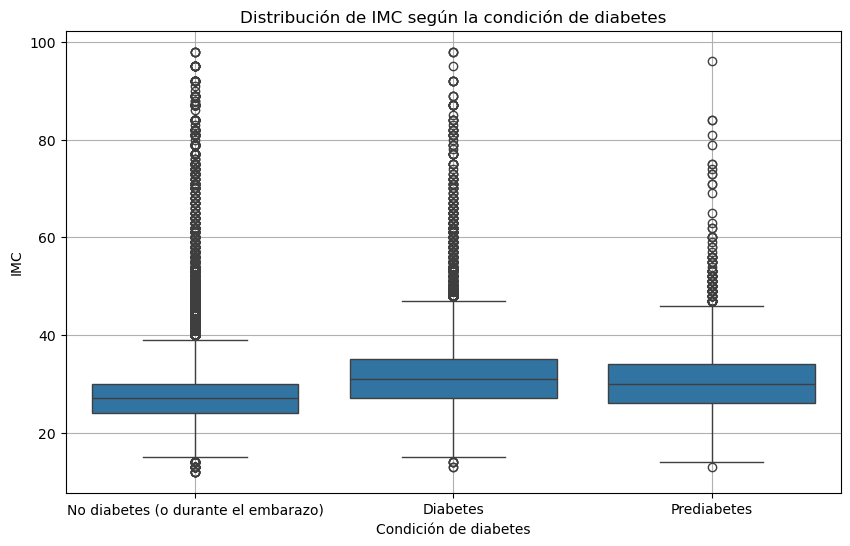

In [21]:
indicadores_graficas_1['Diabetes_etiqueta'] = indicadores_graficas_1['Diabetes'].replace({
    0: 'No diabetes (o durante el embarazo)', 
    1: 'Prediabetes', 
    2: 'Diabetes'
})

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Diabetes_etiqueta', y = 'IMC', data = indicadores_graficas_1)

plt.xlabel('Condición de diabetes')
plt.ylabel('IMC')
plt.title('Distribución de IMC según la condición de diabetes')

plt.grid(True)
plt.show()

In [22]:
indicadores_graficas_1.sample(10)

,Diabetes,Hipertensión,Colesterol,Análisis_colesterol,IMC,Fumador,Ictus,Enfermedad_Cardiaca_Infarto,Actividad_física,Frutas,Verduras,Consumo_alto_alcohol,Cuidado_médico,Motivos_económicos,Salud_general,Salud_mental,Salud_física,Dificultad_caminar,Sexo,Edad,Educación,Ingresos,Diabetes_etiqueta
198694,0.0,0.0,1.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,5.0,8.0,No diabetes (o durante el embarazo)
212457,0.0,1.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,7.0,30.0,0.0,1.0,4.0,6.0,7.0,No diabetes (o durante el embarazo)
81357,2.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,4.0,Diabetes
28925,0.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,9.0,2.0,2.0,No diabetes (o durante el embarazo)
78033,2.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0,Diabetes
215006,2.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0,Diabetes
7224,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,5.0,No diabetes (o durante el embarazo)
38012,2.0,1.0,1.0,1.0,38.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,12.0,3.0,1.0,Diabetes
98981,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,6.0,3.0,No diabetes (o durante el embarazo)
179179,2.0,1.0,1.0,1.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,2.0,3.0,Diabetes
